In [1]:
import math
from logging import debug

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import copy
from math import sqrt,ceil

from PIL.ImageColor import colormap
from scipy.stats import linregress
import libraries as lib
import re
import Weer_data_inladen
from libraries import plot_trajectory_map

In [2]:
#20240713_Huy-Limburg/0026 - 20240713T080342 14h37m16s 145.044km Durnal - Heel
#Configuratie: 
#Roze roer 
#Motortype: 30100/13 (NR 6) 
#@i=7 (NR E) 
#Schakeling: Driehoek 
#Schroef: Incapa Blad 300 N, 15 
#Piloot: 
#Teun van den Elzen (72kg) (11:0
#Tristan Ploeger (80kg) (13:30-2
#Tomas Kramer (70kg) (20:00- 

#20240709_Anse_stroomafwaarts/0002 - 20240709T070429 8h16m21s 51.701km Trevoux - Givors
#Configuratie: 
#Roze roer 
#Motortype: 30100/13 (NR 6) 
#@i=7 (NR E) 
#Schakeling: Driehoek 
#Schroef: Schroef Fee (Chopped Tips) 
#Folder: 
#Folders zijn weer begonnen vanaf mapje 1 vanwege het vervangen van de sd-kaart. 
#0002: Gaat het water in <--- 
#0003: Na opnieuw opstarten. 
#Piloot: 
#Tristan Ploeger (80kg) 
#Jonathan Meuleman (70kg) 

#20240708_Valence/0231 - 20240708T111346 8h9m54s 47.648km La Voulte-sur-Rhone - Tournon-sur-Rhone
#Configuratie: 
#Roze roer 
#Motortype: 30100/13 (NR 6) 
#@i=7 (NR E) 
#Schakeling: Driehoek 
#Schroef: Schroef Fee (Chopped Tips) 
#Piloot: 
#Ruben Jans (77kg) 
#Bastiaan Buurman (75kg) 

#20240714_Limburg-Nijmegen\0028 - 20240714T061924 15h2m29s 148.594km Bunde - Lent
#Configuratie: 
#Roze roer 
#Motortype: 30100/13 (NR 6) 
#@i=7 (NR E) 
#Schakeling: Driehoek 
#Schroef: Incapa Blad 300 N, 15 m/s 
#Piloot: 
#Felix van Beusekom (78kg) (10:20-14:40) 
#Dennis van den Berg (73kg) (14:40-~17:30) 
#Jonathan Gessel (76kg) (~17:30-21:20) 

In [4]:
directory1 = "../../../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240713_Huy-Limburg/0026 - 20240713T080342 14h37m16s 145.044km Durnal - Heel"
directory2 = '../../../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240714_Limburg-Nijmegen/0028 - 20240714T061924 15h2m29s 148.594km Bunde - Lent'
directory3 = '../../../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240708_Valence/0231 - 20240708T111346 8h9m54s 47.648km La Voulte-sur-Rhone - Tournon-sur-Rhone'
directory4 = '../../../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240709_Anse_stroomafwaarts/0002 - 20240709T070429 8h16m21s 51.701km Trevoux - Givors'

result1 = lib.DataUitzoekenGui(directory1)
result2 = lib.DataUitzoekenGui(directory2)
result3 = lib.DataUitzoekenGui(directory3)
result4 = lib.DataUitzoekenGui(directory4)

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_07.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_07.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_05.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_07.csv', '3_MPPT_1_05_07.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

In [9]:
# Na het laden van de bestanden en het klikken op de knop
# Controleer of 'merged_df' in result zit
if 'merged_df' in result1:
    merged_df1 = result1['merged_df'].copy()
    #merged_df2 = result2['merged_df'].copy()
    #merged_df3 = result3['merged_df'].copy()
    #merged_df4 = result4['merged_df'].copy()
    # Gebruik merged_df zoals je wilt
else:
    print("De data is nog niet geladen.")

In [10]:
merged_df1

,1_Datalogger port,"1_Dataloggertijd, in s","1_MPPT-tijd, in s","1_Paneel 1 ingangsstroom, in I","1_Paneel 1 instantaan ingangsvermogen, in W","1_Paneel 1 totale ingangsenergie, in J","1_Paneel 2 ingangsstroom, in I","1_Paneel 2 instantaan ingangsvermogen, in W","1_Paneel 2 totale ingangsenergie, in J","1_Uitgangsspanning, in V",...,"1_Gps-longitude, in graden","1_Gps-latitude, in graden",1_GPS richting,"1_Gps-tijd, in s",1_Format header (>05|05),"1_Paneel 1 ingangsspanning, in V","1_Paneel 2 ingangsspanning, in V","1_Gps-snelheid, in km/u",1_Pirano 1,1_Pirano 2
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:02:17,3.0,137.495000,1200.600600,1.259000,34.976000,1.364471e+04,1.278000,35.254000,1.395039e+04,10.136092,...,459.8611,5020.2014,9.7,60341.000000,05|07,16.191,16.118,0.0,200,221
0 days 00:02:18,3.0,137.998503,1201.104205,1.257010,34.892615,1.365506e+04,1.274521,35.218427,1.396083e+04,10.160170,...,459.8611,5020.2014,9.7,60341.385417,05|07,16.203,16.129,0.0,200,221
0 days 00:02:19,3.0,138.998137,1202.103834,1.256198,35.678376,1.367593e+04,1.273723,36.009406,1.398191e+04,10.207922,...,459.8611,5020.2014,9.7,60342.346535,05|07,16.604,16.532,0.0,200,221
0 days 00:02:20,3.0,140.014688,1203.120331,1.254767,36.787012,1.369768e+04,1.273070,37.158942,1.400386e+04,10.256795,...,459.8611,5020.2014,9.7,60343.267442,05|07,17.025,16.945,0.0,200,221
0 days 00:02:21,3.0,140.997274,1204.102885,1.249620,37.357670,1.371915e+04,1.269510,37.774710,1.402555e+04,10.299422,...,459.8611,5020.2014,9.7,60344.220000,05|07,17.431,17.352,0.0,201,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 14:39:31,3.0,52770.999305,53833.064135,-0.031990,0.006135,1.404521e+06,-0.019875,0.003000,1.405833e+06,-0.095830,...,552.5635,5110.7016,286.3,204054.041667,05|07,-0.117,-0.087,0.0,-7,-8
0 days 14:39:32,3.0,52772.002542,53834.067320,-0.032000,0.006082,1.404521e+06,-0.019887,0.003000,1.405833e+06,-0.095384,...,552.5635,5110.7016,286.3,204055.000000,05|07,-0.118,-0.086,0.0,-7,-8
0 days 14:39:33,3.0,52772.997557,53835.062299,-0.031814,0.006134,1.404521e+06,-0.019866,0.003000,1.405833e+06,-0.095352,...,552.5635,5110.7016,286.3,204055.958763,05|07,-0.117,-0.086,0.0,-7,-8


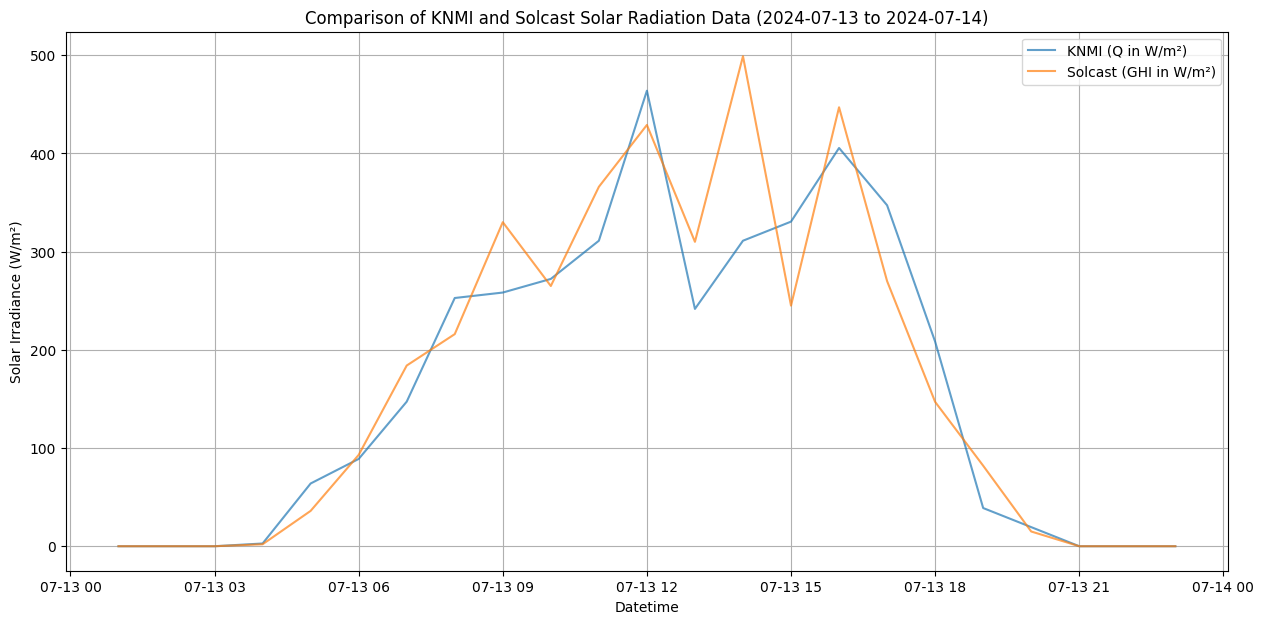

In [11]:
# Load KNMI and Solcast data
knmi_data = Weer_data_inladen.load_knmi_data('data_weer/KNMI_weerdata.txt')
solcast_data = Weer_data_inladen.load_solcast_data('data_weer/Solcast_data_2.csv')

Weer_data_inladen.plot_comparison(knmi_data, solcast_data, '2024-07-13', '2024-07-14')

C:\Users\bono\AppData\Local\Temp\ipykernel_52892\2071493227.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  knmi_data_filtered['seconds'] = (


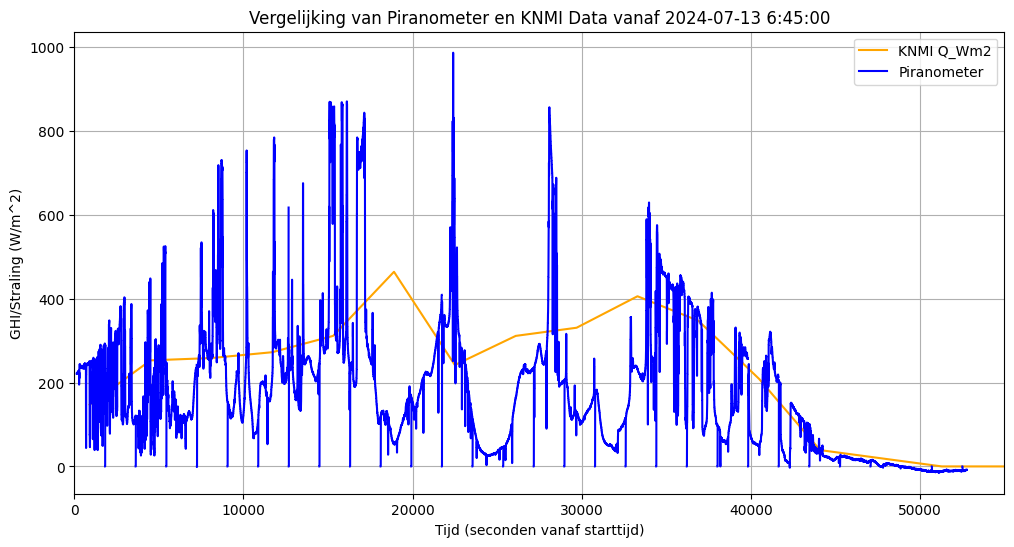

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Zorg ervoor dat KNMI-data correct is geparsed
knmi_data['datetime'] = pd.to_datetime(knmi_data['datetime'])

# Vraag de gebruiker om de starttijd in te vullen
start_time_input = '2024-07-13 6:45:00'

# Converteer de ingevoerde starttijd naar een datetime object met dezelfde tijdzone als KNMI-data
start_time = pd.Timestamp(start_time_input, tz=knmi_data['datetime'].dt.tz)

# Filter KNMI-data op gewenste datums
filter_dates = ['2024-07-13', '2024-07-14']
filter_dates = pd.to_datetime(filter_dates).date
knmi_data_filtered = knmi_data[knmi_data['datetime'].dt.date.isin(filter_dates)]

# Zet KNMI 'datetime' om naar seconden vanaf de starttijd
knmi_data_filtered['seconds'] = (
    (knmi_data_filtered['datetime'] - start_time).dt.total_seconds()
)

# Filter alleen data na de starttijd (seconden >= 0)
knmi_data_filtered = knmi_data_filtered[knmi_data_filtered['seconds'] >= 0]

# Zet de datalogtijd van merged_df1 om naar seconden vanaf de starttijd
merged_df1['seconds'] = pd.to_numeric(merged_df1['1_Dataloggertijd, in s'])

# Plot beide datasets
plt.figure(figsize=(12, 6))

# Plot de gefilterde KNMI-data
plt.plot(knmi_data_filtered['seconds'], knmi_data_filtered['Q_Wm2'], label='KNMI Q_Wm2', color='orange')

# Plot de Piranometer-data uit merged_df1
plt.plot(merged_df1['seconds'], pd.to_numeric(merged_df1['1_Pirano 2']), label='Piranometer', color='blue')

# Voeg labels, titel en legenda toe
plt.xlabel('Tijd (seconden vanaf starttijd)')
plt.ylabel('GHI/Straling (W/m^2)')
plt.title(f'Vergelijking van Piranometer en KNMI Data vanaf {start_time_input}')
plt.legend()
plt.grid()
plt.xlim(0,55000)

# Toon de plot
plt.show()


In [29]:
print(knmi_data_filtered[['datetime', 'seconds']].head())
print(merged_df1[['1_Dataloggertijd, in s', 'seconds']].head())


KeyError: "['seconds'] not in index"